#### **1.** Pick something else on Craigslist: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of EDA you'd do with it. I look at used cars below.

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
# url from the richmond sneaker listings
url = 'https://newyork.craigslist.org/search/cla?query=sneakers#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page

# listing common brands for sneakers
brands = ['adidas', 'nike','reebok','skechers','vans','converse', 'new balance',
          'jordan', 'timberland', 'under armour', 'louis vuitton','balenciaga'
          'cole haan', 'puma', 'hoka','merrell','sperry','cloud']


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

#### **2.** Get your search results of interest and extract data from them, using code similar to what's below.

In [101]:
data = [] # We'll save our listings in this object

for k in range( len(listings) ):
    # title
    title = listings[k].find('div',class_='title').get_text().lower()

    # price
    price_div = listings[k].find('div',class_='price')
    if price_div:
        price = price_div.get_text()
    else:
        price = 'missing'

    # location
    location = listings[k].find('div', class_='location')
    if location:
        location = location.get_text()
    else:
        location = 'missing'

    # link
    link = listings[k].find(href=True)['href']

    # Get brand from the title string:
    words = title.split()
    hits = [word for word in words if word in brands] # Find brands in the title
    if len(hits) == 0:
        brand = 'missing'
    else:
        brand = hits[0]

# I tried a few different things here, but couldn't adjust the code to register
# strings with more than one word for the brand

    # appending the data into columns
    data.append({'title':title,'price':price,'year':year,'link':link,
                 'brand':brand, 'location':location})



#### **3.** Wrangle your data, do some EDA, and make some plots. Try to find some interesting relationships or stories to tell about your data.

In [102]:
# wrangle / data cleaning
sneakers = pd.DataFrame.from_dict(data)
sneakers['price'] = sneakers['price'].str.replace('$','')
sneakers['price'] = sneakers['price'].str.replace(',','')
sneakers['price'] = pd.to_numeric(sneakers['price'],errors='coerce')
sneakers['location'] = sneakers['location'].str.replace(',Va','')
sneakers['location'] = sneakers['location'].str.replace('\n ','')
print(sneakers.shape)

# create csv file for the sneakers data
sneakers.to_csv('craigslist_cville_sneakers.csv')
sneakers.head(10)

(340, 6)


,title,price,year,link,brand,location
0,"levis size 10, denim sneakers, great condition",20,NaN,https://newyork.craigslist.org/que/clo/d/rego-...,missing,Rego Park ...
1,paul smith men's musa trainers/sneakers (12m) ...,120,NaN,https://newyork.craigslist.org/wch/clo/d/peeks...,missing,Peekskill/NYC ...
2,new balance 57/40 pink glow sneakers size 9.5,150,NaN,https://newyork.craigslist.org/brk/clo/d/brook...,missing,Brooklyn ...
3,new adidas busenitz men's sneakers size 10.5 p...,48,NaN,https://newyork.craigslist.org/que/clo/d/ridge...,adidas,Ridgewood 11385 Queens ...
4,brand new w/ box on cloud x black women's snea...,80,NaN,https://newyork.craigslist.org/mnh/clo/d/new-y...,cloud,TriBeCa
5,ultra rare nos true vintage trophy deluxe pro ...,2500,NaN,https://newyork.craigslist.org/mnh/clo/d/new-y...,missing,Downtown ...
6,under armour men sneakers size 10.5,60,NaN,https://newyork.craigslist.org/mnh/clo/d/pater...,missing,manhattan ...
7,mens converse jack purcell leather sneakers. s...,15,NaN,https://newyork.craigslist.org/brk/clo/d/brook...,converse,Sheepshead bay brooklyn...
8,jordan men's sneakers pre-owned - size 12,50,NaN,https://newyork.craigslist.org/que/clo/d/howar...,jordan,Howard Beach ...
9,converse all star chuck taylor sneakers,20,NaN,https://newyork.craigslist.org/brk/clo/d/brook...,converse,Bay Ridge Brooklyn ...


count     340.000000
mean      101.632353
std       232.199926
min         0.000000
25%        20.000000
50%        45.000000
75%        80.000000
max      2500.000000
Name: price, dtype: float64


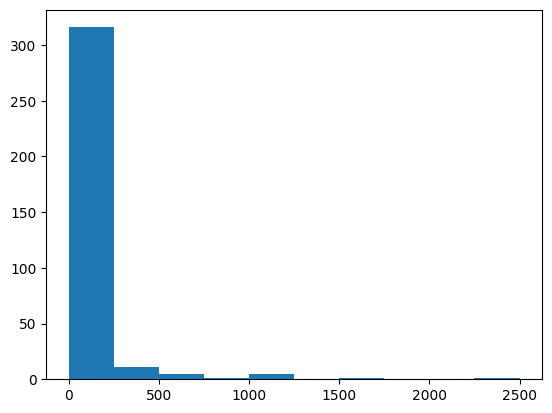

count         340
unique         13
top       missing
freq          225
Name: brand, dtype: object


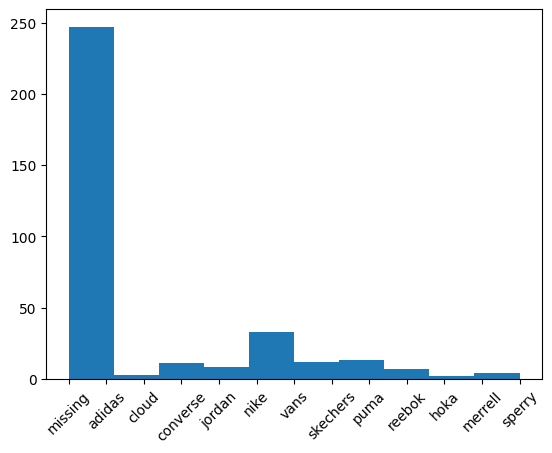

In [109]:
# EDA for price
print(sneakers['price'].describe())
sneakers['price'].hist(grid=False)
plt.show()

# EDA for brand
print(sneakers['brand'].describe())
sneakers['brand'].hist(grid=False)
plt.xticks(rotation=45)
plt.show()

In [104]:
# Price by brand:
sneakers.loc[:,['price','brand']].groupby('brand').describe()

price                                                           
          count        mean         std   min    25%   50%     75%     max
brand                                                                     
adidas     22.0   47.000000   34.320617   0.0  21.25  44.0   58.75   140.0
cloud       3.0   93.333333   51.316014  50.0  65.00  80.0  115.00   150.0
converse   11.0   35.000000   27.202941  10.0  15.00  30.0   50.00   100.0
hoka        2.0   82.500000   10.606602  75.0  78.75  82.5   86.25    90.0
jordan      8.0   93.125000   65.679824  15.0  50.00  70.0  131.25   215.0
merrell     2.0    7.500000    3.535534   5.0   6.25   7.5    8.75    10.0
missing   225.0  127.404444  279.965306   0.0  20.00  49.0   99.00  2500.0
nike       33.0   56.969697   54.286557   1.0  20.00  40.0   65.00   225.0
puma       13.0   30.461538   14.958918   8.0  15.00  30.0   40.00    60.0
reebok      7.0   82.714286   99.540133   5.0  30.00  60.0   77.00   300.0
skechers    5.0   21.600000   13.049904   8.0  10.00  20.0   35.00    35.0
sperry      2.0   25.000000    0.000000  25.0  25.00  25.0   25.00    25.0
vans        7.0   36.000000   27.117030  10.0  15.00  30.0   53.50    75.0

In [105]:
# location by brand:
sneakers.loc[:,['location','brand']].groupby('brand').describe()

location                                                            \
            count unique                                                top   
brand                                                                         
adidas         22     10                         Brooklyn               ...   
cloud           3      3                         TriBeCa                      
converse       11      9                         Park Slope             ...   
hoka            2      2                         Midtown West           ...   
jordan          8      6                         Brooklyn               ...   
merrell         2      2                         Tribeca                      
missing       225     75                         Brooklyn               ...   
nike           33     22                         Upper East Side        ...   
puma           13      9                         Brooklyn               ...   
reebok          7      7                         Mineola                      
skechers        5      5                         Park Slope Brooklyn NY ...   
sperry          2      1                         brooklyn               ...   
vans            7      6                         manhattan              ...   

               
         freq  
brand          
adidas      8  
cloud       1  
converse    2  
hoka        1  
jordan      2  
merrell     1  
missing    66  
nike        4  
puma        3  
reebok      1  
skechers    1  
sperry      2  
vans        2

In [106]:
sneakers.loc[ sneakers['brand']=='nike',:]

,title,price,year,link,brand,location
10,nike sneakers - brand new in box - size 10,50,NaN,https://newyork.craigslist.org/mnh/clo/d/new-y...,nike,Upper East Side ...
16,women’s nike aspire breast cancer awareness sn...,40,NaN,https://newyork.craigslist.org/mnh/clo/d/new-y...,nike,Midtown East ...
21,nike sneakers for kids boys girls women,40,NaN,https://newyork.craigslist.org/stn/clo/d/state...,nike,staten island ...
38,"nike air jordan sneakers 2021 edition white, r...",38,NaN,https://newyork.craigslist.org/que/clo/d/long-...,nike,Long Island City ...
55,starbury sneakers nos new mens 9.5 like nike af1,20,NaN,https://newyork.craigslist.org/lgi/clo/d/baldw...,nike,Baldwin
66,nike x air presto acronym dynamic yellow sneakers,50,NaN,https://newyork.craigslist.org/brk/clo/d/brook...,nike,brooklyn ...
114,size 7 - nike air max 1 se polar sneakers (aqu...,55,NaN,https://newyork.craigslist.org/brk/clo/d/brook...,nike,brooklyn ...
123,women's nike air force 1 easyon sneakers in wh...,58,NaN,https://newyork.craigslist.org/brk/clo/d/brook...,nike,Prospect Park South ...
131,nike x air presto acronym dynamic yellow sneakers,50,NaN,https://newyork.craigslist.org/brk/clo/d/brook...,nike,brooklyn ...
149,nike high top kids sneakers 10.5c,20,NaN,https://newyork.craigslist.org/mnh/clo/d/new-y...,nike,Upper East Side ...


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'missing'),
  Text(1, 0, 'adidas'),
  Text(2, 0, 'cloud'),
  Text(3, 0, 'converse'),
  Text(4, 0, 'jordan'),
  Text(5, 0, 'nike'),
  Text(6, 0, 'vans'),
  Text(7, 0, 'skechers'),
  Text(8, 0, 'puma'),
  Text(9, 0, 'reebok'),
  Text(10, 0, 'hoka'),
  Text(11, 0, 'merrell'),
  Text(12, 0, 'sperry')])

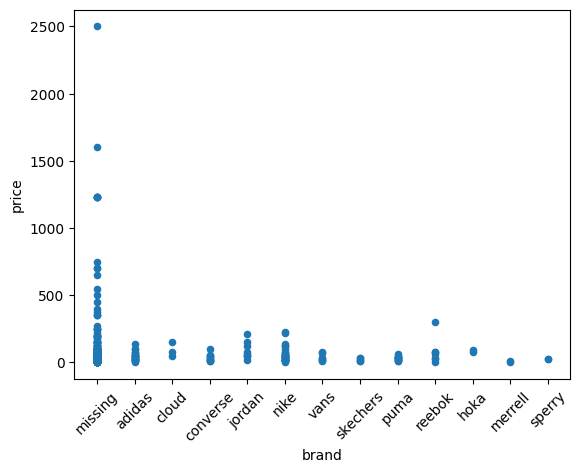

In [110]:
sneakers.plot.scatter('brand','price')
plt.xticks(rotation=45)

**GRAPH INSIGHT:** There don't seem to be many notable differences in price between brands, although Jordan, Nike, and Reebok tend to have some higher listings on average.

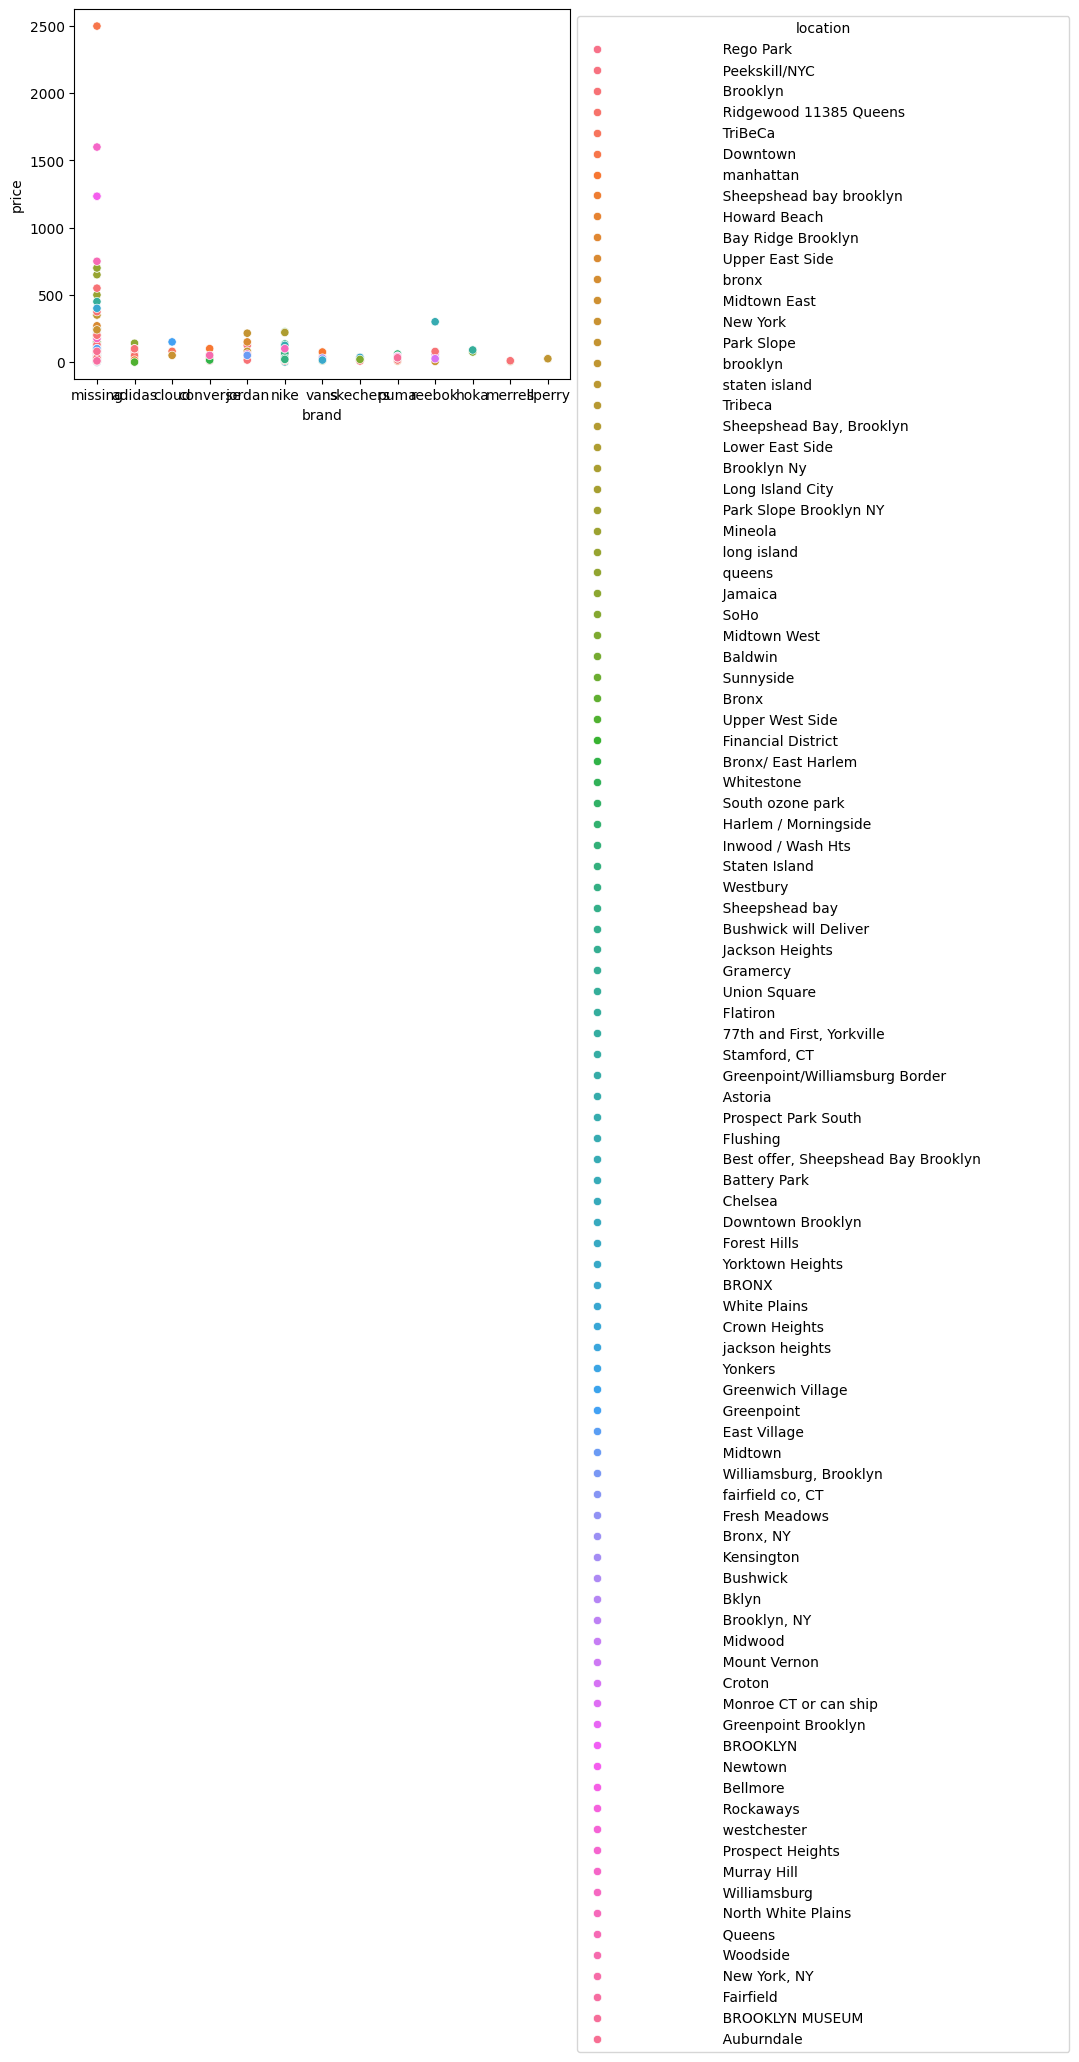

In [108]:
sneakers_plot = sns.scatterplot(data=sneakers, x='brand', y='price',hue='location')
sns.move_legend(sneakers_plot, "upper left", bbox_to_anchor=(1, 1))